## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.025723  1.134291  0.859599  1.060963 -1.072915  0.149095
1 -0.192470 -0.519498  0.652018  0.970020 -1.527622 -0.133200
2  0.136179  0.240814 -1.665474  1.686748  0.062605  2.203839
3  0.720373  0.505851 -1.380770 -0.832331 -0.515650  0.575196
4  0.375266 -1.326483  0.158044 -1.344587 -0.179121 -1.850018


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9718483	total: 57.1ms	remaining: 57s
1:	learn: 0.9628534	total: 57.6ms	remaining: 28.7s
2:	learn: 0.9536688	total: 58.2ms	remaining: 19.3s
3:	learn: 0.9437713	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9347796	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9268482	total: 59.9ms	remaining: 9.92s
6:	learn: 0.9174935	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9095001	total: 61.9ms	remaining: 7.67s
8:	learn: 0.9015275	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8916071	total: 63ms	remaining: 6.24s
10:	learn: 0.8840248	total: 63.5ms	remaining: 5.71s
11:	learn: 0.8740615	total: 64ms	remaining: 5.27s
12:	learn: 0.8657746	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8581994	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8520803	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8446203	total: 65.8ms	remaining: 4.05s
16:	learn: 0.8364474	total: 66.3ms	remaining: 3.83s
17:	learn: 0.8293167	total: 66.8ms	remaining: 3.64s
18:	learn: 0.8229950	total: 67.3ms	remaining: 3.47

95:	learn: 0.4360538	total: 103ms	remaining: 968ms
96:	learn: 0.4331355	total: 103ms	remaining: 963ms
97:	learn: 0.4300582	total: 104ms	remaining: 957ms
98:	learn: 0.4272844	total: 104ms	remaining: 950ms
99:	learn: 0.4236575	total: 105ms	remaining: 943ms
100:	learn: 0.4204929	total: 105ms	remaining: 937ms
101:	learn: 0.4171149	total: 106ms	remaining: 930ms
102:	learn: 0.4141454	total: 106ms	remaining: 922ms
103:	learn: 0.4111357	total: 106ms	remaining: 915ms
104:	learn: 0.4075813	total: 107ms	remaining: 910ms
105:	learn: 0.4040760	total: 107ms	remaining: 904ms
106:	learn: 0.4007148	total: 108ms	remaining: 898ms
107:	learn: 0.3979005	total: 108ms	remaining: 894ms
108:	learn: 0.3945057	total: 109ms	remaining: 889ms
109:	learn: 0.3916991	total: 109ms	remaining: 884ms
110:	learn: 0.3886695	total: 110ms	remaining: 880ms
111:	learn: 0.3864892	total: 110ms	remaining: 874ms
112:	learn: 0.3838630	total: 111ms	remaining: 868ms
113:	learn: 0.3808400	total: 111ms	remaining: 864ms
114:	learn: 0.378

257:	learn: 0.1350324	total: 187ms	remaining: 539ms
258:	learn: 0.1339084	total: 188ms	remaining: 537ms
259:	learn: 0.1328265	total: 188ms	remaining: 536ms
260:	learn: 0.1317542	total: 189ms	remaining: 534ms
261:	learn: 0.1308070	total: 189ms	remaining: 533ms
262:	learn: 0.1299348	total: 190ms	remaining: 532ms
263:	learn: 0.1291688	total: 190ms	remaining: 530ms
264:	learn: 0.1281023	total: 191ms	remaining: 529ms
265:	learn: 0.1271663	total: 191ms	remaining: 528ms
266:	learn: 0.1265059	total: 192ms	remaining: 526ms
267:	learn: 0.1254923	total: 192ms	remaining: 525ms
268:	learn: 0.1245253	total: 193ms	remaining: 523ms
269:	learn: 0.1235441	total: 193ms	remaining: 522ms
270:	learn: 0.1224960	total: 194ms	remaining: 521ms
271:	learn: 0.1215338	total: 194ms	remaining: 519ms
272:	learn: 0.1209305	total: 194ms	remaining: 518ms
273:	learn: 0.1199906	total: 195ms	remaining: 516ms
274:	learn: 0.1190184	total: 195ms	remaining: 515ms
275:	learn: 0.1179225	total: 196ms	remaining: 514ms
276:	learn: 

430:	learn: 0.0444050	total: 288ms	remaining: 381ms
431:	learn: 0.0441552	total: 289ms	remaining: 380ms
432:	learn: 0.0439412	total: 289ms	remaining: 379ms
433:	learn: 0.0436972	total: 290ms	remaining: 378ms
434:	learn: 0.0434712	total: 290ms	remaining: 377ms
435:	learn: 0.0432339	total: 291ms	remaining: 376ms
436:	learn: 0.0430663	total: 291ms	remaining: 375ms
437:	learn: 0.0428560	total: 292ms	remaining: 374ms
438:	learn: 0.0426958	total: 292ms	remaining: 373ms
439:	learn: 0.0424185	total: 293ms	remaining: 372ms
440:	learn: 0.0421863	total: 293ms	remaining: 371ms
441:	learn: 0.0419341	total: 293ms	remaining: 370ms
442:	learn: 0.0416758	total: 294ms	remaining: 370ms
443:	learn: 0.0414660	total: 294ms	remaining: 369ms
444:	learn: 0.0412604	total: 295ms	remaining: 368ms
445:	learn: 0.0410063	total: 295ms	remaining: 367ms
446:	learn: 0.0407851	total: 296ms	remaining: 366ms
447:	learn: 0.0406481	total: 296ms	remaining: 365ms
448:	learn: 0.0405136	total: 297ms	remaining: 364ms
449:	learn: 

589:	learn: 0.0199305	total: 373ms	remaining: 259ms
590:	learn: 0.0198258	total: 374ms	remaining: 259ms
591:	learn: 0.0197302	total: 374ms	remaining: 258ms
592:	learn: 0.0196283	total: 375ms	remaining: 257ms
593:	learn: 0.0195208	total: 375ms	remaining: 256ms
594:	learn: 0.0194266	total: 376ms	remaining: 256ms
595:	learn: 0.0193273	total: 376ms	remaining: 255ms
596:	learn: 0.0192456	total: 377ms	remaining: 254ms
597:	learn: 0.0191560	total: 377ms	remaining: 253ms
598:	learn: 0.0190761	total: 378ms	remaining: 253ms
599:	learn: 0.0189744	total: 378ms	remaining: 252ms
600:	learn: 0.0188835	total: 378ms	remaining: 251ms
601:	learn: 0.0188046	total: 379ms	remaining: 250ms
602:	learn: 0.0187282	total: 379ms	remaining: 250ms
603:	learn: 0.0186304	total: 380ms	remaining: 249ms
604:	learn: 0.0185444	total: 380ms	remaining: 248ms
605:	learn: 0.0184679	total: 380ms	remaining: 247ms
606:	learn: 0.0183947	total: 381ms	remaining: 247ms
607:	learn: 0.0183008	total: 381ms	remaining: 246ms
608:	learn: 

805:	learn: 0.0097478	total: 473ms	remaining: 114ms
806:	learn: 0.0097422	total: 473ms	remaining: 113ms
807:	learn: 0.0097368	total: 474ms	remaining: 113ms
808:	learn: 0.0097191	total: 474ms	remaining: 112ms
809:	learn: 0.0096786	total: 475ms	remaining: 111ms
810:	learn: 0.0096489	total: 475ms	remaining: 111ms
811:	learn: 0.0096436	total: 476ms	remaining: 110ms
812:	learn: 0.0095901	total: 476ms	remaining: 110ms
813:	learn: 0.0095849	total: 477ms	remaining: 109ms
814:	learn: 0.0095559	total: 477ms	remaining: 108ms
815:	learn: 0.0095507	total: 478ms	remaining: 108ms
816:	learn: 0.0094996	total: 478ms	remaining: 107ms
817:	learn: 0.0094836	total: 479ms	remaining: 106ms
818:	learn: 0.0094314	total: 479ms	remaining: 106ms
819:	learn: 0.0094264	total: 479ms	remaining: 105ms
820:	learn: 0.0093998	total: 480ms	remaining: 105ms
821:	learn: 0.0093949	total: 480ms	remaining: 104ms
822:	learn: 0.0093454	total: 481ms	remaining: 103ms
823:	learn: 0.0093299	total: 481ms	remaining: 103ms
824:	learn: 

973:	learn: 0.0059709	total: 555ms	remaining: 14.8ms
974:	learn: 0.0059440	total: 555ms	remaining: 14.2ms
975:	learn: 0.0059332	total: 556ms	remaining: 13.7ms
976:	learn: 0.0059246	total: 556ms	remaining: 13.1ms
977:	learn: 0.0059087	total: 557ms	remaining: 12.5ms
978:	learn: 0.0059071	total: 557ms	remaining: 11.9ms
979:	learn: 0.0058965	total: 557ms	remaining: 11.4ms
980:	learn: 0.0058897	total: 558ms	remaining: 10.8ms
981:	learn: 0.0058546	total: 558ms	remaining: 10.2ms
982:	learn: 0.0058394	total: 559ms	remaining: 9.66ms
983:	learn: 0.0058193	total: 559ms	remaining: 9.09ms
984:	learn: 0.0058116	total: 559ms	remaining: 8.52ms
985:	learn: 0.0058012	total: 560ms	remaining: 7.95ms
986:	learn: 0.0057910	total: 560ms	remaining: 7.38ms
987:	learn: 0.0057894	total: 561ms	remaining: 6.81ms
988:	learn: 0.0057793	total: 561ms	remaining: 6.24ms
989:	learn: 0.0057646	total: 562ms	remaining: 5.67ms
990:	learn: 0.0057306	total: 562ms	remaining: 5.11ms
991:	learn: 0.0057097	total: 563ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

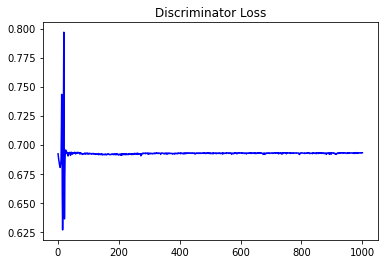

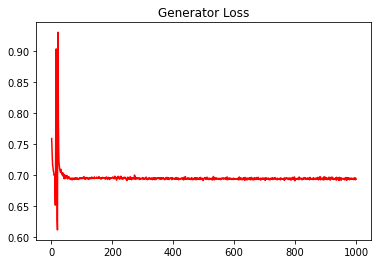

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05696199648363267


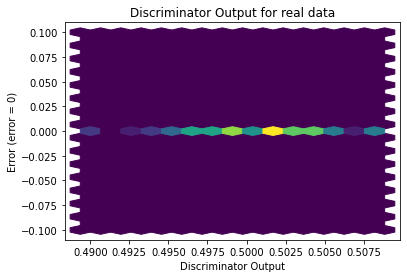

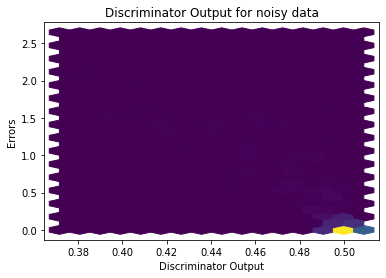

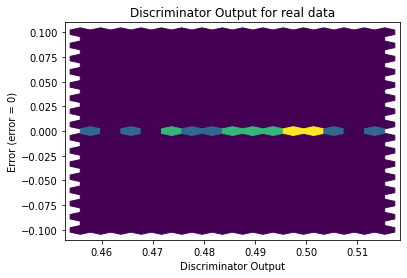

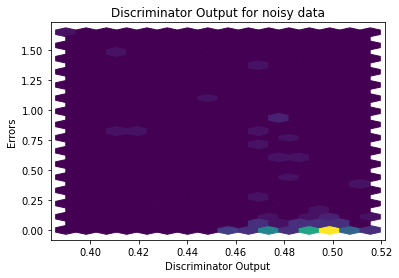

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


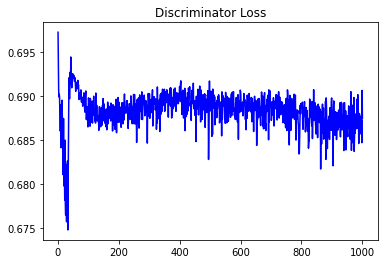

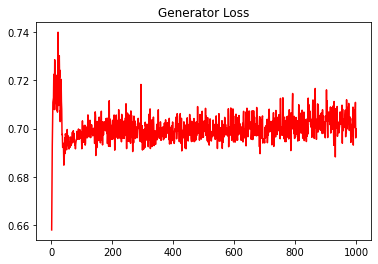

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.038821944079399845


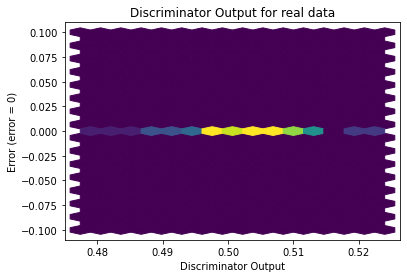

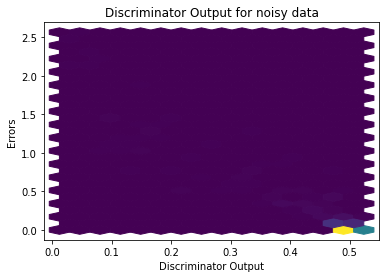

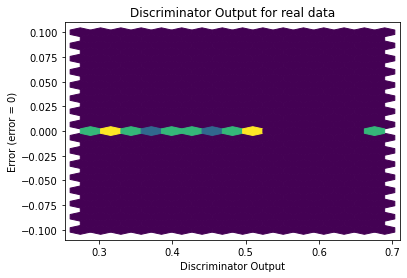

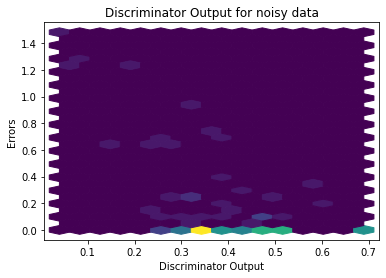

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1560]], requires_grad=True)
